In [76]:
%reset

In [77]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import xclim as xc
import xarray as xr

In [78]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)

In [79]:
import sys
#this is to reload the work in progress modules that are not in the current directory
import importlib
import hydroplotting

In [80]:
%reload_ext autoreload
%autoreload 1

In [81]:
#load and plot SNOTEL data
from hydroplotting import funcutils as fc

#get paths for data files
path_Skook_obs = ROOT_DIR + '/Data/Raw/bcqc_47.68000_-121.61000._Skookum_Creek.txt'
path_Alpine_obs = ROOT_DIR + '/Data/Raw/bcqc_47.78000_-121.70000_Alpine_Meadows.txt'

#path to SPU data
path_Alpine_P_SPU = ROOT_DIR + '/Data/Raw/p0908_precip_AlpineM.txt'
path_Skook_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.txt'

path_Alpine_T_SPU = ROOT_DIR + '/Data/Raw/t0908_temp_AlpineM.txt'
path_Skook_T_SPU = ROOT_DIR + '/Data/Raw/t0912_temp_SkooKumCr.txt'

#path_snotel_skooK_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.txt'
#path to model data
path_Alpine_model = ROOT_DIR + '/Data/Raw/comparison_Pixel.Alpine_Meadows.csv'
path_Skook_model = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek.csv'

#path to Tolt Dam
path_Tolt_dam_T_SPU = ROOT_DIR + 'Data/Raw/t8508_tempToltDam.txt'

In [82]:
df_snotel_obs_SPU_Skookum = fc.spu_snotel_data(path_Skook_P_SPU)
df_snotel_obs_SPU_Skookum
df_snotel_obs_SPU_Alpine = fc.spu_snotel_data(path_Alpine_P_SPU)
df_snotel_obs_SPU_Alpine

,DateTime,Max,Min,Avg,Total,water_year
DateTime,,,,,,
1979-10-01,1979-10-01,0.0,0.0,0.0,0.0,1980
1979-10-02,1979-10-02,0.0,0.0,0.0,0.0,1980
1979-10-03,1979-10-03,0.0,0.0,0.0,0.0,1980
1979-10-04,1979-10-04,0.0,0.0,0.0,0.0,1980
1979-10-05,1979-10-05,0.0,0.0,0.0,0.0,1980
...,...,...,...,...,...,...
2020-09-27,2020-09-27,0.0,0.0,0.0,0.0,2020
2020-09-28,2020-09-28,0.0,0.0,0.0,0.0,2020
2020-09-29,2020-09-29,0.0,0.0,0.0,0.0,2020


In [83]:
#get into the xarray and xclim format for use with the xclim package
#model
df_model_data_Alpine = fc.get_model_dataframe(path_Alpine_model)
df_model_data_Skookum = fc.get_model_dataframe(path_Skook_model)
ds_model_point_Alpine = fc.model_point_data_xr(df_model_data_Alpine)
ds_model_point_Skookum = fc.model_point_data_xr(df_model_data_Skookum)

#observations
df_snotel_Skookum = fc.snotel_data(path_Skook_obs)
df_snotel_Alpine = fc.snotel_data(path_Alpine_obs)
ds_bcbq_obs_Skookum = fc.bcbq_snotel_data_xr(df_snotel_Skookum)
ds_bcbq_obs_Alpine = fc.bcbq_snotel_data_xr(df_snotel_Alpine)

#SPU
df_snotel_obs_SPU_Skookum_P = fc.spu_snotel_data(path_Skook_P_SPU)
df_snotel_obs_SPU_Alpine_P = fc.spu_snotel_data(path_Alpine_P_SPU)
ds_snotel_obs_SPU_Skookum_P = fc.spu_snotel_data_xr(df_snotel_obs_SPU_Skookum)
ds_snotel_obs_SPU_Alpine_P = fc.spu_snotel_data_xr(df_snotel_obs_SPU_Alpine)
#df_snotel_obs_SPU_Skookum = fc.spu_snotel_data(path_Alpine_P_SPU)
#df_snotel_obs_SPU_Alpine = fc.spu_snotel_data(path_Skook_P_SPU)

df_snotel_obs_SPU_Skookum_T = fc.spu_snotel_data(path_Skook_T_SPU)
df_snotel_obs_SPU_Alpine_T = fc.spu_snotel_data(path_Alpine_T_SPU)

#SPU_data_frame_T['Tmean_C'] = (SPU_data_frame_T['Avg'] - 32) * (5 / 9)
#SPU_data_frame_T['Tmin_C'] = (SPU_data_frame_T['Min'] - 32) * (5 / 9)
#SPU_data_frame_T['Tmax_C'] = (SPU_data_frame_T['Max'] - 32) * (5 / 9)

ds_snotel_obs_SPU_Skookum_T = fc.spu_snotel_data_xr_T(df_snotel_obs_SPU_Skookum_T)
ds_snotel_obs_SPU_Alpine_T = fc.spu_snotel_data_xr_T(df_snotel_obs_SPU_Alpine_T)

#back to data frames for plotting
df_snotel_obs_SPU_Skookum_T_ = ds_snotel_obs_SPU_Skookum_T.to_dataframe()
df_snotel_obs_SPU_Alpine_T_ = ds_snotel_obs_SPU_Alpine_T.to_dataframe()

In [84]:
#calculate annual precipitation SPU
annual_P_Alpine_SPU = xc.atmos.precip_accumulation(ds_snotel_obs_SPU_Alpine_P.Total, freq="YS")
annual_P_Skookum_SPU = xc.atmos.precip_accumulation(ds_snotel_obs_SPU_Alpine_P.Total, freq="YS")

#convert to dataframe for plotting
annual_P_Alpine_SPU_df = annual_P_Alpine_SPU.to_dataframe()
annual_P_Skookum_SPU_df = annual_P_Skookum_SPU.to_dataframe()

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


In [85]:
#calculate annual precipitation model
annual_P_Alpine_model = xc.atmos.precip_accumulation(ds_model_point_Alpine.prec_point, freq="YS")
annual_P_Skookum_model = xc.atmos.precip_accumulation(ds_model_point_Skookum.prec_point, freq="YS")

#convert to dataframe for plotting
annual_P_Alpine_model_df = annual_P_Alpine_model.to_dataframe()
annual_P_Skookum_model_df = annual_P_Skookum_model.to_dataframe()

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


Text(0, 0.5, 'Total annual precipitation  [m]')

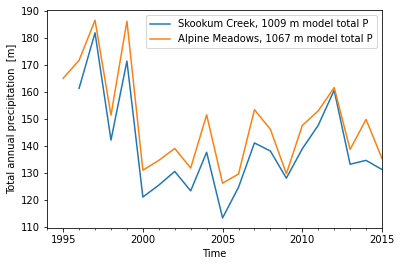

In [86]:
ax = annual_P_Skookum_model_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Alpine_model_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  [m]')

Text(0, 0.5, 'Model SWE [m]')

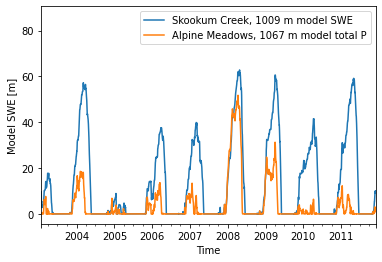

In [87]:
#plot model SWE
ax = df_model_data_Skookum.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model SWE')
df_model_data_Alpine.plot(kind='line', y = 'swq', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
ax.set_xlim([datetime(2003, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Model SWE [m]')

In [88]:
#calculate mean difference Skookum-Alpine
mean_model_diff_P = annual_P_Skookum_model_df.mean() - annual_P_Alpine_model_df.mean()
print('Mean annual precip model Skookum =', annual_P_Skookum_model_df.mean())
print('Mean annual precip model Alpine =', annual_P_Alpine_model_df.mean())
print('Model diff in annual P Skookum-Alpine =', mean_model_diff_P)

Mean annual precip model Skookum = prcptot    139.3085
dtype: float64
Mean annual precip model Alpine = prcptot    148.578229
dtype: float64
Model diff in annual P Skookum-Alpine = prcptot   -9.269729
dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


Text(0, 0.5, 'Total annual precipitation  []')

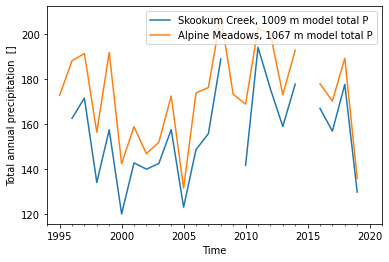

In [89]:
#calculate total P from observations
annual_P_Alpine_bcbq_obs = xc.atmos.precip_accumulation(ds_bcbq_obs_Alpine.daily_P_in, freq="YS")
annual_P_Skookum_bcbq_obs = xc.atmos.precip_accumulation(ds_bcbq_obs_Skookum.daily_P_in, freq="YS")

#convert to dataframe
annual_P_Alpine_bcbq_obs_df = annual_P_Alpine_bcbq_obs.to_dataframe()
annual_P_Skookum_bcbq_obs_df = annual_P_Skookum_bcbq_obs.to_dataframe()

#plot obs P

ax = annual_P_Skookum_bcbq_obs_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Alpine_bcbq_obs_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')

prcptot   -24.342605
dtype: float64

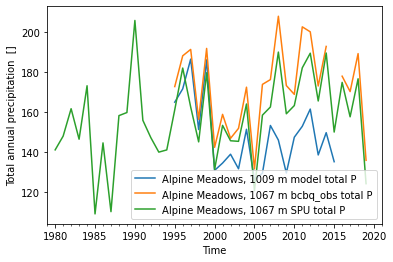

In [90]:
#snotel_Skookum.index.set_names('time', inplace=True)
#plot observed total P model vs. observed at Alpine Meadows
ax = annual_P_Alpine_model_df.plot(kind='line',  y = 'prcptot', label = 'Alpine Meadows, 1009 m model total P')
annual_P_Alpine_bcbq_obs_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m bcbq_obs total P', ax = ax)
annual_P_Alpine_SPU_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m SPU total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')
mean_model_obs_diff_P = annual_P_Alpine_model_df.mean()-annual_P_Alpine_bcbq_obs_df.mean()
mean_model_obs_diff_P

prcptot   -16.482409
dtype: float64

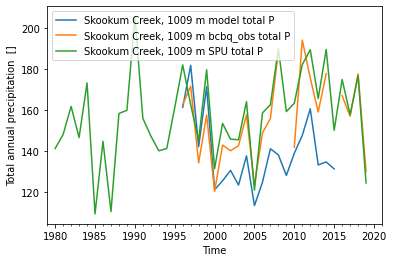

In [91]:
#plot observed total P model vs. observed at Alpine Meadows
ax = annual_P_Skookum_model_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Skookum_bcbq_obs_df.plot(kind='line', y = 'prcptot', label = 'Skookum Creek, 1009 m bcbq_obs total P', ax = ax)
annual_P_Skookum_SPU_df.plot(kind='line', y = 'prcptot', label = 'Skookum Creek, 1009 m SPU total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')
mean_model_obs_diff_P = annual_P_Skookum_model_df.mean()-annual_P_Skookum_bcbq_obs_df.mean()
mean_model_obs_diff_P

Text(0, 0.5, 'Total annual precipitation  []')

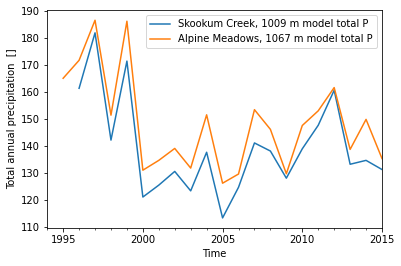

In [92]:
#plot model precip and obs precip at Alpine
#plot observed total P
ax = annual_P_Skookum_model_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Alpine_model_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')

Text(0, 0.5, 'SWE [m]')

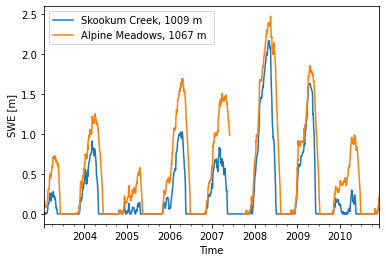

In [93]:
#plot SNOTELS:
ax = df_snotel_Skookum.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, 1009 m')
df_snotel_Alpine.plot(kind='line', y = 'SWE_m', label = 'Alpine Meadows, 1067 m ', ax = ax)
ax.set_xlim([datetime(2003, 1, 21), datetime(2010, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [m]')

#plt.show()

Text(0, 0.5, 'SWE [in]')

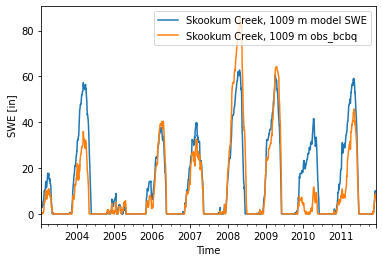

In [94]:
#plot modeled SWE vs. observed at Skookum Creek
ax = df_model_data_Skookum.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model SWE')
df_snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
ax.set_xlim([datetime(2003, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

Text(0, 0.5, 'SWE [in]')

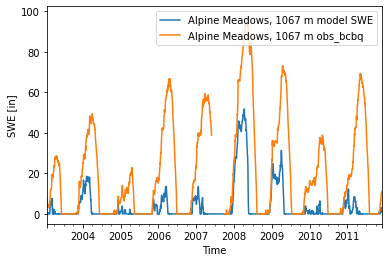

In [95]:
#plot modeled SWE vs. observed at Skookum Creek
ax = df_model_data_Alpine.plot(kind='line',  y = 'swq', label = 'Alpine Meadows, 1067 m model SWE')
df_snotel_Alpine.plot(kind='line',  y = 'SWE_in', label = 'Alpine Meadows, 1067 m obs_bcbq', ax = ax)
ax.set_xlim([datetime(2003, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

In [96]:
df_snotel_obs_SPU_Alpine_T

,DateTime,Max,Min,Avg,water_year,Tmean_C,Tmin_C,Tmax_C
DateTime,,,,,,,,
1979-10-01,1979-10-01,58.3,40.4,48.950,1980,9.416667,4.666667,14.611111
1979-10-02,1979-10-02,77.3,35.6,56.300,1980,13.500000,2.000000,25.166667
1979-10-03,1979-10-03,60.3,35.6,48.558,1980,9.198889,2.000000,15.722222
1979-10-04,1979-10-04,62.3,39.6,50.596,1980,10.331111,4.222222,16.833333
1979-10-05,1979-10-05,62.3,36.6,49.575,1980,9.763889,2.555556,16.833333
...,...,...,...,...,...,...,...,...
2020-09-27,2020-09-27,56.0,41.0,47.375,2020,8.541667,5.000000,13.333333
2020-09-28,2020-09-28,74.0,51.0,60.500,2020,15.833333,10.555556,23.333333
2020-09-29,2020-09-29,77.0,61.0,65.500,2020,18.611111,16.111111,25.000000


Annual T mean Alpine model 4.909564300978213
Annual T mean Alpine observed 4.896350872233407
Difference annual Tmean model-obs 0.013213428744805356


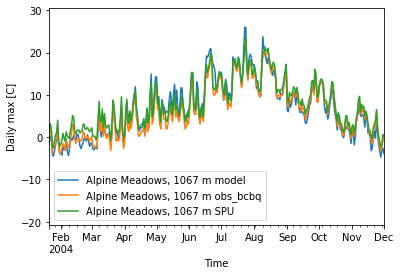

In [97]:
#plot temperature data
#plot modeled T vs. observed at Alpine Meadows
ax = df_model_data_Alpine.plot(kind='line',  y = 'tmean_point', label = 'Alpine Meadows, 1067 m model')
df_snotel_Alpine.plot(kind='line',  y = 'Tmean_C', label = 'Alpine Meadows, 1067 m obs_bcbq', ax = ax)
df_snotel_obs_SPU_Alpine_T_.plot(kind='line',  y = 'Tmean_C', label = 'Alpine Meadows, 1067 m SPU', ax = ax)

ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Daily max [C]')

mean_diff_T = df_model_data_Alpine.tmean_point.mean() - df_snotel_Alpine.Tmean_C.mean()

print('Annual T mean Alpine model', df_model_data_Alpine.tmean_point.mean())
print('Annual T mean Alpine observed', df_snotel_Alpine.Tmean_C.mean())
print('Difference annual Tmean model-obs', mean_diff_T)

In [98]:
df_snotel_obs_SPU_Alpine_T

,DateTime,Max,Min,Avg,water_year,Tmean_C,Tmin_C,Tmax_C
DateTime,,,,,,,,
1979-10-01,1979-10-01,58.3,40.4,48.950,1980,9.416667,4.666667,14.611111
1979-10-02,1979-10-02,77.3,35.6,56.300,1980,13.500000,2.000000,25.166667
1979-10-03,1979-10-03,60.3,35.6,48.558,1980,9.198889,2.000000,15.722222
1979-10-04,1979-10-04,62.3,39.6,50.596,1980,10.331111,4.222222,16.833333
1979-10-05,1979-10-05,62.3,36.6,49.575,1980,9.763889,2.555556,16.833333
...,...,...,...,...,...,...,...,...
2020-09-27,2020-09-27,56.0,41.0,47.375,2020,8.541667,5.000000,13.333333
2020-09-28,2020-09-28,74.0,51.0,60.500,2020,15.833333,10.555556,23.333333
2020-09-29,2020-09-29,77.0,61.0,65.500,2020,18.611111,16.111111,25.000000


6.95526844222229
10.270715267044466
-3.3154468248221756


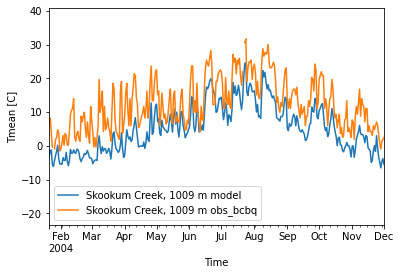

In [99]:
#plot modeled T vs. observed at Skookum Creek
ax = df_model_data_Skookum.plot(kind='line',  y = 'tmean_point', label = 'Skookum Creek, 1009 m model')
df_snotel_Skookum.plot(kind='line',  y = 'Tmax_C', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Tmean [C]')

mean_diff_T = df_model_data_Skookum.tmax_point.mean() - df_snotel_Skookum.Tmax_C.mean()

print(df_model_data_Skookum.tmax_point.mean())
print(df_snotel_Skookum.Tmax_C.mean())
print(mean_diff_T)

In [100]:
airTDJF_snotel_bcbq_Skookum = xc.atmos.tg_mean(ds_bcbq_obs_Skookum.Tmean_C, season="MAM")
airTDJF_snotel_bcbq_Alpine = xc.atmos.tg_mean(ds_bcbq_obs_Alpine.Tmean_C, season="MAM")

airTDJF_model_Skookum = xc.atmos.tg_mean(ds_model_point_Skookum.tmean_point, season="MAM")
airTDJF_model_Alpine = xc.atmos.tg_mean(ds_model_point_Alpine.tmean_point, season="MAM")

tas_C_snotel_bcbq_Skookum = xc.units.convert_units_to(airTDJF_snotel_bcbq_Skookum, "degC")
tas_C_snotel_bcbq_Alpine = xc.units.convert_units_to(airTDJF_snotel_bcbq_Alpine, "degC")

tas_C_model_Skookum = xc.units.convert_units_to(airTDJF_model_Skookum, "degC")
tas_C_model_Alpine = xc.units.convert_units_to(airTDJF_model_Alpine, "degC")


print("airTDJF_snotel_bcbq_Skookum =", tas_C_snotel_bcbq_Skookum.mean())
print("airTDJF_snotel_bcbq_Alpine =", tas_C_snotel_bcbq_Alpine.mean())

print("airTDJF_model_Skookum =", tas_C_model_Skookum.mean())
print("airTDJF_model_Alpine =", tas_C_model_Alpine.mean())

#airTDJF_DM = xc.atmos.tg_mean(ds2.airtemp, season="DJF")
#airT_Y_DM = xc.atmos.tg_mean(ds2.airtemp, freq="YS")



airTDJF_snotel_bcbq_Skookum = <xarray.DataArray 'tg_mean' ()>
array(4.25279891)
airTDJF_snotel_bcbq_Alpine = <xarray.DataArray 'tg_mean' ()>
array(3.00115166)
airTDJF_model_Skookum = <xarray.DataArray 'tg_mean' ()>
array(1.12149961)
airTDJF_model_Alpine = <xarray.DataArray 'tg_mean' ()>
array(3.13892598)


/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/indicators/atmos/_precip.py:80: UserWarning: Variable does not have a `standard_name` attribute.
  cfchecks.check_valid(tas, "standard_name", "air_temperature")
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Varia

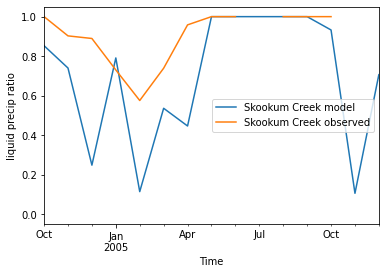

In [101]:
pr_liquid_ratio_Skookum_model = xc.indicators.atmos._precip.liquid_precip_ratio(ds_model_point_Skookum.prec_point, ds_model_point_Skookum.tmean_point, freq="M")
pr_liquid_ratio_Skookum_observed = xc.indicators.atmos._precip.liquid_precip_ratio(ds_bcbq_obs_Skookum.daily_P_in, ds_bcbq_obs_Skookum.Tmean_C, freq="M")

ax = pr_liquid_ratio_Skookum_model.to_dataframe().liquid_precip_ratio.plot(kind='line',  label = 'Skookum Creek model')
pr_liquid_ratio_Skookum_observed.to_dataframe().liquid_precip_ratio.plot(kind='line', label = 'Skookum Creek observed', ax = ax)
ax.set_xlim([datetime(2004, 10, 1), datetime(2005, 12, 1)])
plt.xlabel('Time')
plt.ylabel('liquid precip ratio')
plt.gca().legend(('Skookum Creek model','Skookum Creek observed'))

In [102]:
pr_liquid_ratio_Alpine_model.to_dataframe.plot(kind='line',  y = 'tmax_point', label = 'Skookum Creek, 1009 m model')

NameError: name 'pr_liquid_ratio_Alpine_model' is not defined

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/indicators/atmos/_precip.py:80: UserWarning: Variable does not have a `standard_name` attribute.
  cfchecks.check_valid(tas, "standard_name", "air_temperature")
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Varia

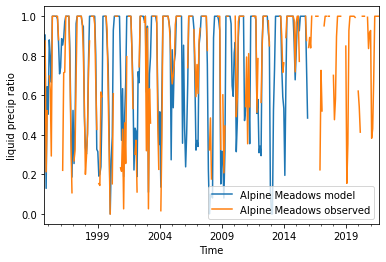

In [103]:
pr_liquid_ratio_Alpine_model = xc.indicators.atmos._precip.liquid_precip_ratio(ds_model_point_Alpine.prec_point, ds_model_point_Alpine.tmean_point, freq="M")
pr_liquid_ratio_Alpine_observed = xc.indicators.atmos._precip.liquid_precip_ratio(ds_bcbq_obs_Alpine.daily_P_in, ds_bcbq_obs_Alpine.Tmean_C, freq="M")

ax = pr_liquid_ratio_Alpine_model.to_dataframe().liquid_precip_ratio.plot(kind='line',  label = 'Alpine Meadows')
pr_liquid_ratio_Alpine_observed.to_dataframe().liquid_precip_ratio.plot(kind='line', label = 'Alpine Meadows', ax = ax)
#ax.set_xlim([datetime(2004, 10, 1), datetime(2005, 12, 1)])
plt.xlabel('Time')
plt.ylabel('liquid precip ratio')
plt.gca().legend(('Alpine Meadows model','Alpine Meadows observed'))

In [104]:
#get monthly air tem means

In [105]:
path_snotel_skooK_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.txt'
#skooK_P_SPU = pd.read_csv(ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.csv')

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


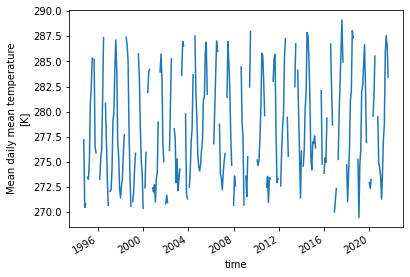

In [106]:
temp = xc.atmos.tg_mean(ds_bcbq_obs_Alpine.Tmean_C, freq="MS")
temp.plot()

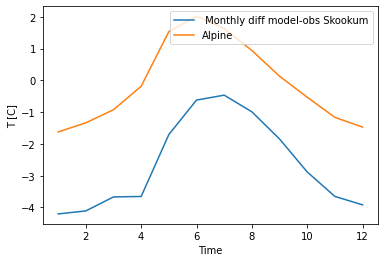

In [108]:
mo_Tmean_bcbq_obs_Alpine = ds_bcbq_obs_Alpine.Tmean_C.groupby("time.month").mean(dim='time')
#print('Monthly mean obs snotel Alpine = ',mo_Tmean_bcbq_obs_Alpine)
mo_Tmean_model_Alpine = ds_model_point_Alpine.tmean_point.groupby("time.month").mean(dim='time')
#print('Monthly mean model snotel Alpine =',mo_Tmean_model_Alpine)
diff_mean_monthly_mean_model_obs_Alpine = mo_Tmean_model_Alpine - mo_Tmean_bcbq_obs_Alpine

mo_Tmean_bcbq_obs_Skookum = ds_bcbq_obs_Skookum.Tmean_C.groupby("time.month").mean(dim='time')
mo_Tmean_model_Skookum = ds_model_point_Skookum.tmean_point.groupby("time.month").mean(dim='time')
diff_mean_monthly_mean_model_obs_Skookum = mo_Tmean_model_Skookum - mo_Tmean_bcbq_obs_Skookum

ax = diff_mean_monthly_mean_model_obs_Skookum.plot.line()
diff_mean_monthly_mean_model_obs_Alpine.plot.line()
#ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('T [C]')
plt.gca().legend((' Monthly diff model-obs Skookum','Alpine'))
plt.show()


In [ ]:
out2 = xc.atmos.tx_days_above(ds_temp.Tmean_C, thresh="20 C", freq="MS")

In [ ]:
out2

In [ ]:
time_index = np.array(time_index)
time_index

In [ ]:
#temp = skook_ds.Tmean_C
#temp.index.name = 'time'
#test.rename({'index':'time'})
#test

In [ ]:
skook_ds.index.name = 'time'
skook_ds.rename({'index':'time'})
skook_ds

In [ ]:
#temp.to_dataset()
out2 = xc.atmos.tx_days_above(da, thresh="20 C", freq="MS")

In [ ]:
%reset

In [ ]:
import xarray as xr
import xclim as xc

In [ ]:
#ds = xr.open_dataset('/Users/nicoleta/Desktop/code/summa_snow_layering_analysis-master/run_simulations/reynolds/forcing/forcing_above_aspen.nc')
ds1 = xr.open_dataset('/Users/nicoleta/Desktop/code/summa_snow_layering_analysis-master/run_simulations/coldeport/forcings/col-de-port_1993-2011.nc', engine = 'scipy')


In [ ]:
ds.airtemp.plot()

In [ ]:
#ds.airtemp.time.head()
#ds.airtemp.resample(time = '1D').mean()
#ds.airtemp

In [ ]:
#out = xc.atmos.tx_max(ds.airtemp, freq="YS")
#print(out)

In [ ]:
#out2 = xc.atmos.tx_days_above(ds_temp.Tmean_C, thresh="20 C", freq="MS")

In [ ]:
with xc.set_options(
        check_missing="pct",
        missing_options={"pct": dict(tolerance=0.1)},
        data_validation="log",
):
    # Change the missing method to "percent", instead of the default "any"
    # Set the tolerance to 10%, periods with more than 10% of missing data
    #     in the input will be masked in the ouput.
    airTDJF = out = xc.atmos.tx_mean(ds.airtemp, season="DJF")
    airT_Y = out = xc.atmos.tx_mean(ds.airtemp, freq="YS")

In [ ]:
tas_C = xc.units.convert_units_to(airTDJF, "degC")
tas_C_Y = xc.units.convert_units_to(airT_Y, "degC")
print(tas_C.mean())
print(tas_C_Y.mean())